# Test to use rasterio to create geotiles

In [6]:
import rasterio
import matplotlib.pyplot as plt

# open GeoTIFF-File
with rasterio.open('GMRTv4_3_0_20241126topo.tif') as dataset:
    print("Fileformat:", dataset.driver) 
    print("Width x Height:", dataset.width, "x", dataset.height)
    print("Cannelcount:", dataset.count)
    print("Georef:", dataset.transform)
    print("Projection:", dataset.crs)

    # Read single first band als NumPy
    band1 = dataset.read(1)

Fileformat: GTiff
Width x Height: 3922 x 3141
Cannelcount: 1
Georef: | 0.00, 0.00,-153.66|
| 0.00,-0.00, 55.44|
| 0.00, 0.00, 1.00|
Projection: None


## Show image with colors 

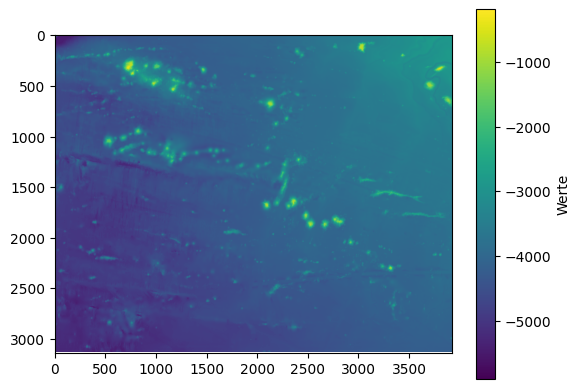

In [7]:
# show image in colors
plt.imshow(band1, cmap="viridis")  # Alternativen: 'plasma', 'terrain', etc.
plt.colorbar(label="Werte")
plt.show()

In [11]:
import os
import rasterio
from rasterio.windows import Window
import numpy as np
from PIL import Image

output_folder = "tiles"
input_file = "GMRTv4_3_0_20241126topo.tif"
tile_height = 245
tile_width = 245


os.makedirs(output_folder, exist_ok=True)

with rasterio.open(input_file) as src:
    
    width = src.width
    height = src.height

    
    for i in range(0, height, tile_height):
        for j in range(0, width, tile_width):
            window = Window(j, i, tile_width, tile_height)
            transform = src.window_transform(window)

            data = src.read(window=window)


            image = data[0]  # take first band
            tile_filename = f"{output_folder}/tile_{i}_{j}.png"
                
            # convert to imagesdata
            image = ((image - image.min()) / (image.max() - image.min()) * 255).astype(np.uint8)
            Image.fromarray(image).save(tile_filename)

            print(f"Tile saved: {tile_filename}")

/tmp/ipykernel_16377/1997643710.py:33: RuntimeWarning: invalid value encountered in cast
  image = ((image - image.min()) / (image.max() - image.min()) * 255).astype(np.uint8)


Tile saved: tiles/tile_0_0.png
Tile saved: tiles/tile_0_245.png
Tile saved: tiles/tile_0_490.png
Tile saved: tiles/tile_0_735.png
Tile saved: tiles/tile_0_980.png
Tile saved: tiles/tile_0_1225.png
Tile saved: tiles/tile_0_1470.png
Tile saved: tiles/tile_0_1715.png
Tile saved: tiles/tile_0_1960.png
Tile saved: tiles/tile_0_2205.png
Tile saved: tiles/tile_0_2450.png
Tile saved: tiles/tile_0_2695.png
Tile saved: tiles/tile_0_2940.png
Tile saved: tiles/tile_0_3185.png
Tile saved: tiles/tile_0_3430.png
Tile saved: tiles/tile_0_3675.png
Tile saved: tiles/tile_0_3920.png
Tile saved: tiles/tile_245_0.png
Tile saved: tiles/tile_245_245.png
Tile saved: tiles/tile_245_490.png
Tile saved: tiles/tile_245_735.png
Tile saved: tiles/tile_245_980.png
Tile saved: tiles/tile_245_1225.png
Tile saved: tiles/tile_245_1470.png
Tile saved: tiles/tile_245_1715.png
Tile saved: tiles/tile_245_1960.png
Tile saved: tiles/tile_245_2205.png
Tile saved: tiles/tile_245_2450.png
Tile saved: tiles/tile_245_2695.png
Tile